$\newcommand{\set}[2]{\big\{#1\,\ {\large:}\ \,#2\big\}}
\newcommand{\eps}{\varepsilon}
\newcommand{\abs}[1]{\left\vert#1\right\vert}
\newcommand{\ceil}[1]{\left\lceil#1\right\rceil}
\newcommand{\floor}[1]{\left\lfloor#1\right\rfloor}
$


# Localização de zeros de funções

## $ \S 1 $ Introdução

Um ponto $ \zeta $ do domínio de uma função $ f $ de uma variável é dito um **zero** de $ f $ caso
$$ f(\zeta) = 0 .$$
Nesta situação também dizemos que $ \zeta $ é uma **raiz** da equação acima.

📝 '$ \zeta $' é a sexta letra do alfabeto grego, denominada *zeta*.

A busca por zeros de uma função é um dos problemas mais freqüentes em Ciência e Engenharia. Embora a determinação *analítica* dos zeros seja difícil mesmo nos casos mais simples, por exemplo em que a função é um polinômio de grau $ > 2 $, existem métodos numéricos gerais que nos permitem encontrar zeros de funções contínuas arbitrárias com alta precisão e baixo uso de recursos computacionais.

📝 Observe que encontrar uma raiz de uma equação qualquer em uma variável, digamos, da forma 
$$
g(x) = h(x),
$$
é equivalente à tarefa de se encontrar um zero da função $ f(x) = g(x) - h(x) $.

Ainda que todas as funções usuais estudadas em Cálculo possam ser estendidas a funções de uma variável complexa, estaremos interessados aqui em encontrar apenas os zeros *reais* de uma *função real contínua de uma variável*. Contudo, algumas das técnicas que estudaremos, em especial o método de Newton, também podem ser aplicadas a funções complexas.

O sistema de ponto flutuante empregado em computação impõe restrições inevitáveis à precisão do cálculo dos valores de uma função. Por isto na prática não podemos esperar encontrar um ponto $ \zeta $ onde a função valha exatamente $ 0 $, como ilustrado no exemplo abaixo. Em vez disto, buscamos encontrar um *intervalo* suficientemente pequeno onde a função troca de sinal.

**Problema 1:** Considere os polinômios
$$ p(x) = 2x - 0.2 \qquad \text{e} \qquad q(x) = 3 x - 0.3 $$
Note que $ a = \frac{1}{10} $ é um zero tanto de $ p $ quanto de $ q $.

(a) Usando `lambda`, defina $ p(x) $ e $ q(x) $ como funções em Python.

(b) Agora defina um procedimento `checa_zero(f, x)` que, dados uma função $ f $ e um número $ x $ em seu domínio, retorna `True` se `f(x) == 0` e `False` caso contrário. Qual é o resultado da aplicação deste procedimento aos pares $ (p, a) $ e $ (q, a) $? Como você explica esta discrepância?

(c) Como poderíamos modificar a definição de `checa_zero` de modo que ela acuse que $ q $ possui um zero em $ a $? Quais as desvantagens da sua proposta?

*Solução:*

## $ \S 2 $ Localização de raízes

### $ 2.1 $ O Teorema do Valor Intermediário

**Teorema do Valor Intermediário:** Seja $ f \colon [a, b] \to \mathbb R $ uma função _contínua_ definida num intervalo $ [a, b] $ _limitado e fechado_. Então $ f $ assume em $ [a, b] $ todos os valores possíveis entre $ f(a) $ e $ f(b) $.

⚡ **Demonstração informal:** Suponha por concretude que $ f(a) < 0 $ e $ f(b) > 0 $. Imaginando o gráfico da função contínua $ f $, isto significa que em $ a $ ele está abaixo do eixo-$x$ e em $ b $ acima. Queremos mostrar que em algum momento ele cruza o eixo-$x$.

Considere o conjunto $ N $ (de negativo) definido por
$$
N = \set{x \in [a,b]}{f(x) < 0}.
$$
Então $ N $ é não-vazio porque contém $ a $. Além disto, $ b $ é cota superior para $ N $. Seja $ c \in [a, b] $ a *menor* cota superior possível para $ N $, i.e.:
1. $ x \le c $ para todo $ x \in N $ (pois exigimos que $ c $ fosse cota superior);
2. Se $ \eps > 0 $, então $ x - \eps $ não é cota superior para $ N $ (pois exigimos que $ c $ fosse a *menor* dentre as cotas superiores).

Então há apenas três opções:
* $ f(c) < 0 $, e por continuidade $ f(x) < 0 $ para todo $ x > c $ suficientemente próximo de $ c $, contradizendo o fato que $ c $ era cota superior de $ N $; ou
* $ f(c) > 0 $, e por continuidade $ f(x) > 0 $ para todo $ x < c $ suficientemente próximo de $ c $, contradizendo o fato que $ c $ era a *menor* cota superior de $ N $; ou
* $ f(c) = 0 $, o que estabelece a conclusão desejada.
<div style="text-align: right">$ \blacksquare $ </div>

O resultado abaixo segue imediatamente do TVI. Apesar de simples, ele é a base dos vários métodos que estudaremos para obtenção de raízes de equações.

**Corolário 1 (encaixotamento de zeros):** Seja $ f $ uma função contínua definida num intervalo. Se
$$ f(c)f(d) < 0\ , $$
então $ f $ possui pelo menos um zero no subintervalo de extremidades $ c $ e $ d $.

Informalmente, se os sinais dos valores de $ f $ em dois pontos  são opostos, então entre eles deve existir algum zero.

**Problema 2:** Mostre que:

(a) Existe um número $ a > 1 $ tal que $ a^a = 23 $.

(b) Este número é único. *Dica:* Considere a função $ f(x) = x^x $ para $ x > 1 $ e calcule sua derivada.

*Solução:*

**Problema 3:** Seja $ n $ um inteiro qualquer.

(a) Mostre analiticamente ou com ajuda do computador que a função tangente assume valores de sinais opostos em
$$
a_n = n\pi + \frac{\pi}{4} \quad \text{e} \quad b_n = n \pi + \frac{3\pi}{4}.
$$

(b) Existe um zero entre $ \frac{\pi}{4} $ e $ \frac{3\pi}{4} $? Justifique, em vista do Corolário 1. *Dica:* Esboce num papel o gráfico da função tangente. Quais são os pontos de descontinuidade?

(c) Mais geralmente, existe um zero $ c_n $ no intervalo $ (a_n,b_n) $? E no intervalo $ \big(b_n, a_{n+1}\big) $?

*Solução:*

In [ ]:
from numpy import tan, pi, sign

### $ 2. 2 $ Descrição do procedimento para localização de uma raiz e critérios de parada

Todos os métodos para localização de zeros que estudaremos são *iterativos*. Partindo de uma estimativa inicial para um zero $ \zeta $, a cada passo utilizamos a estimativa anterior para obter uma aproximação mais refinada para $ \zeta $, até que esta seja julgada boa o suficiente. Os *critérios de parada* mais comuns são:
1. A distância entre o zero $ \zeta $ e sua aproximação atual é menor que um $ \eps > 0 $ escolhido previamente.
2. O valor da função na aproximação atual é menor que $ \eps $ em valor absoluto.
3. O número de iterações excede uma cota $ N$ pré-fixada.

**Problema 4:** Construa um procedimento `checa_zero` que tem por parâmetros: uma função real $ f $; dois pontos $ a $ e $ b $ em seu domínio; e uma constante $ \eps > 0 $; e que retorna `True` se e somente se:
* $ \abs{b-a} < \eps $; e
* $ \abs{f(m)} < \eps $, onde $ m $ é o ponto médio de $ a $ e $ b $.

*Solução:*

### $ 2.3 $ Encaixotamento de zeros

Qualquer dos métodos que estudaremos requer como passo preliminar o **encaixotamento** de um zero, ou seja, a determinação de um intervalo onde $ f $ troca de sinal. A escolha deste intervalo é crucial: para algumas escolhas o método em questão pode convergir muito lentamente ou até falhar.

Para encaixotar um zero de uma função, as três opções mais comuns são:
* Usar a a teoria subjacente para advinhar a sua localização aproximada, no caso em que a função provém de um modelo da Física ou Engenharia;
* Esboçar o gráfico da função e estimar visualmente um subintervalo onde ele cruza o eixo-$x$;
* Aplicar uma busca sistemática, avaliando o sinal da função em pontos sucessivos para localizar um subintervalo onde a função troca de sinal.

Destes três métodos, apenas o terceiro é rígido o suficiente para ser programado com facilidade, o que não quer dizer que os outros dois sejam menos valiosos.

📝 **Isolar** um zero significa encontrar um intervalo que o contém em seu interior mas que não contém qualquer outro zero. Se um intervalo contém mais de um zero, em geral não há como controlar para qual deles um método iterativo convergirá, por isto sempre que possível é desejável isolar um zero, não somente encaixotá-lo.

## $ \S 3 $ Esboço do gráfico de uma função de uma variável

Em Python, para se traçar e visualizar gráficos, utiliza-se geralmente a biblioteca **Matplotlib**, mais precisamente o seu submódulo **PyPlot**:

In [ ]:
import matplotlib.pyplot as plt

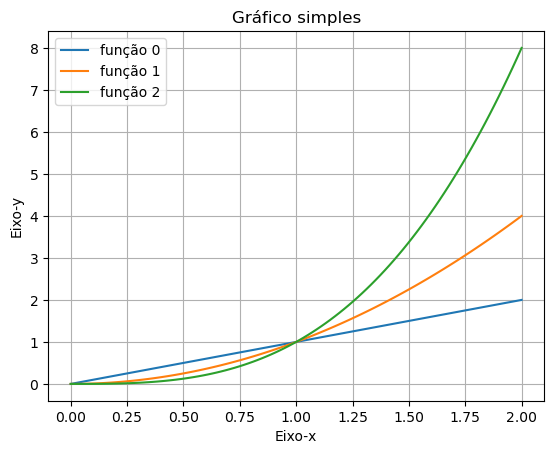

In [88]:
def plota_funcoes(a, b, *fs):
    """
    Entradas:
        * Extremidades a < b de um intervalo.
        * Um número qualquer (>= 1) de funções definidas em [a, b].
    Exibe num mesmo diagrama o gráfico das funções e retorna None.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    x = np.linspace(a, b, 100)  # Amostra de valores de x
    for i, f in enumerate(fs):
        plt.plot(x, f(x), label=f'função {i}')  # Plotar dados; parâmetros: (x, y, etiqueta).
    plt.xlabel('Eixo-x')
    plt.ylabel('Eixo-y')
    plt.grid(True)
    plt.title("Gráfico simples")
    plt.legend()
    
    return None
    
f = lambda x: x
g = lambda x: x**2
h = lambda x: x**3
plota_funcoes(0, 2, f, g, h)

## $ \S 4 $ Busca incremental para encaixotamento de raízes

Suponha que queiramos encaixotar um zero de uma função contínua $ f \colon [a, b] \to \mathbb{R} $. Usando o método da **busca incremental**, começamos escolhendo um **incremento** ou **tamanho de passo** $ h > 0 $. Então calculamos o sinal de
$$
f(x_i)f(x_{i+1}) \quad \text{para} \quad x_i = a+ih \quad (i = 0, 1, \dots )
$$
sucessivamente.
* Se $ f(x_i)f(x_{i+1}) \le 0 $ para algum $ i $, então o intervalo $ [x_i,x_{i+1}] $ deve conter um zero de $ f $, pelo Corolário 1.
* Caso contrário, eventualmente teremos $ x_{i+1} > b $ e a busca terá sido inconclusiva.

In [52]:
def busca_incremental(f, a, b, h):
    """
    Começando com x_1 = a e x_2 = a + h e com incrementos
    de h, retorna o primeiro par de pontos consecutivos onde
    f assume sinais opostos.
    """
    from numpy import sign
    
    # Inicializando:
    x_0 = a
    x_1 = a + h
    f_0 = f(x_0)
    f_1 = f(x_1)
    
    while sign(f_0) == sign(f_1):
        if x_1 > b:
            return None, None
        x_0, f_0 = x_1, f_1
        x_1 += h
        f_1 = f(x_1)
        
    return x_0, x_1

⚠️ Se $ f $ não tem zeros no intervalo $ [a,b] $, obviamente a busca será mal-sucedida. Por outro lado, mesmo que $ f $ tenha zeros aí, por menor que seja o valor do incremento $ h $, não há como garantir *a priori* que a busca será bem sucedida, ou que o intervalo resultante conterá um *único* zero.

**Problema 5:**

(a) Quantos zeros a função $ f(x) = \sin(x) - 0.999 $ tem no intervalo $ [0, 30\pi] $?

(b) Mostre que `busca_incremental` com tamanho de passo $ h = 1 $ não consegue encaixotar nenhum deles.

*Solução:*

In [78]:
from numpy import sin, pi



**Problema 6:** O polinômio $ x^3 - 10x^2 + 5 $ possui um zero entre $ 0 $ e $ 1 $. Encaixote este zero dentro de um intervalo de comprimento no máximo $ 10^{-3} $.

## $ \S 5 $ Busca incremental adaptativa

**Definição 1:** As funções

\begin{alignat*}{9}
    \floor{\cdot} \colon \mathbb{R} \to \mathbb{Z},
    \quad \floor{x} & = \text{maior inteiro $ \le x $} \\
    \ceil{\cdot} \colon \mathbb{R} \to \mathbb{Z},
    \quad \ceil{x} & = \text{menor inteiro $ \ge x $} \\
\end{alignat*}
são chamadas de funções **chão** e **teto** respectivamente. 

**Teorema 2:** _No pior caso, a busca incremental aplicada a uma função definida no intervalo $ [a, b] $ com tamanho de passo $ h $ requer_
$$
    \boxed{n = \floor{\frac{b-a}{h}} + 1 \ \text{avaliações}.}
$$

**Prova:** Suponha que a função à qual a busca foi aplicada não possua zeros em $ [a, b] $. Então precisamos avaliá-la em cada ponto $ x_i = a + ih $ tal que $ x_i \le b $, começando de $ i = 0 $. O último inteiro $ i $ que satisfaz esta condição é
$$
    \floor{\frac{b-a}{h}}. \tag*{$\blacksquare$}
$$

Por exemplo, se quisermos localizar o zero de uma função definida no intervalo $ [0, 1] $ com precisão de ao menos $ 5 $ dígitos, precisamos realizar a princípio $ 10^5 $ avaliações da função. Em geral, para uma tolerância pequena relativamente ao comprimento do intervalo original, o custo computacional pode ser inaceitavelmente alto.

Uma alternativa para tentar reduzir este custo é implementar uma **busca adaptativa**, em que começamos com um incremento de tamanho $ h = \frac{b-a}{2} $ e a cada passo reduzimos o comprimento do incremento pela metade até que ele fique menor que a tolerância desejada.

In [79]:
def busca_adaptativa(f, a, b, h_max):
    """
    Começando com incremento de tamanho h = (b - a) / 2,
    a cada passo realiza uma busca incremental no intervalo [a, b]
    anterior com tamanho de passo h / 2. Se a busca é bem sucedida,
    atualizamos a, b a sua saída x_0, x_1; caso contrário, utilizamos
    os mesmos valores de a, b no próximo passo. A busca termina
    uma vez que h < h_max.
    """
    from numpy import sign
    
    # Inicializando:
    x_0 = a
    x_1 = b
    h =  (b - a) / 2
    
    while h >= h_max:
        x_0, x_1 = busca_incremental(f, a, b, h)
        if x_0:
            a = x_0
            b = x_1
        h /= 2
    
    if x_0:
        return x_0, x_1
    else:
        print("Busca inconclusiva!")
        return None, None

In [80]:
f = lambda x: x**3 - 10 * x**2 + 5
a = 0
b = 1
h = 1e-3
busca_adaptativa(f, a, b, h)

(0.734375, 0.736328125)